In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


The main aim of this notebook is to train models for 250 dataset using CNN. We will use split network where it as two outputs and then merge.


In [2]:
musicFeatures = pd.read_pickle("./musicFeatures.pkl")  

In [3]:
musicFeatures.shape

(26900, 22)

In [4]:
musicFeatures.head(3)

,id,genre,mfccFeature_0,mfccFeature_1,mfccFeature_2,mfccFeature_3,mfccFeature_4,mfccFeature_5,mfccFeature_6,mfccFeature_7,...,mfccFeature_10,mfccFeature_11,mfccFeature_12,mfccFeature_13,mfccFeature_14,themeFeature_0,themeFeature_1,themeFeature_2,themeFeature_3,themeFeature_4
0,124425_0,Folk,"[-367.4169, -240.58614, -193.78488, -180.29262...","[163.79123, 170.1294, 171.51189, 161.30435, 14...","[6.0959854, -5.9718704, -3.6486344, -1.2554941...","[53.194122, 63.06723, 60.13885, 54.763412, 52....","[16.68528, 19.538809, 19.626118, 18.60508, 23....","[-23.51472, -19.84507, -16.962742, -13.548637,...","[6.3363132, -1.276854, -5.610017, -4.050003, -...","[-20.14743, -24.12778, -16.919537, -7.6289234,...",...,"[3.951639, -4.166794, -8.241913, -9.794014, -1...","[5.920375, 9.249519, 8.353765, 11.909894, 14.4...","[-12.381685, -16.062777, -16.373697, -15.77498...","[-3.8526406, -3.5650363, -4.6753526, -5.407305...","[-4.4005404, -11.534243, -12.7789135, -14.0914...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."
1,124425_1,Folk,"[-176.67264, -169.07156, -142.83098, -116.0994...","[125.95861, 142.0693, 138.62712, 128.68915, 12...","[-42.819057, -54.282654, -64.97652, -73.68849,...","[68.79902, 82.17572, 71.34984, 73.27362, 84.63...","[15.051884, 15.13154, 15.273981, 14.384039, 15...","[-5.963161, -10.348415, -12.421081, -9.166971,...","[18.740742, 19.350863, 8.707056, 3.6187146, 1....","[-11.269847, -7.254199, 1.2921772, -1.4600475,...",...,"[-5.3846745, -10.779312, -19.985872, -18.81395...","[12.694374, 11.362453, 8.072839, 4.8536325, -0...","[3.3793998, -0.6741159, -0.14108896, -5.083455...","[-19.578459, -20.371014, -11.236882, -7.421087...","[-8.606797, -10.857103, -13.955954, -13.888264...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."
2,124425_2,Folk,"[-112.90256, -84.587326, -92.53052, -99.84867,...","[118.598724, 102.67175, 82.80994, 73.35031, 71...","[-33.237568, -38.343197, -34.45424, -24.077305...","[50.234768, 52.99376, 56.314552, 51.52988, 53....","[18.136402, 22.863585, 18.818027, 11.438265, 8...","[-23.589928, -19.38637, -15.253525, -5.8537474...","[11.365215, 6.558339, -1.7250502, -4.8964157, ...","[-8.613762, -10.419959, -4.151663, -1.5471857,...",...,"[-19.939487, -16.535833, -21.92295, -25.605438...","[12.999569, 8.9071, 3.3847241, 5.747637, 2.470...","[-5.4092526, -7.6361217, -13.698164, -13.45112...","[-0.42731082, -2.8598223, -1.4495995, 1.697975...","[-14.1753845, -20.045826, -20.387835, -21.9254...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."


In [5]:
"""
Verifying all shapres and types of data
"""
print(musicFeatures.shape)
print('MFCC Features \n')
print(type(musicFeatures['mfccFeature_0'].iloc[0]))
print(len(musicFeatures['mfccFeature_0'].iloc[0]))
print(type(musicFeatures['mfccFeature_0'].iloc[0][0]))

print('Theme Features \n')
print(type(musicFeatures['themeFeature_0'].iloc[0]))
print(musicFeatures['themeFeature_0'].iloc[0].size)
print(type(musicFeatures['themeFeature_0'].iloc[0][0]))



(26900, 22)
MFCC Features 

<class 'numpy.ndarray'>
250
<class 'numpy.float64'>
Theme Features 

<class 'numpy.ndarray'>
250
<class 'numpy.float64'>


We split the dataset into x and y, y having the predicting columns

In [6]:
y = musicFeatures['genre']
x = musicFeatures.loc[:, musicFeatures.columns != 'genre']
x = x.drop(['id'],axis =1)

print(x.shape)
print(y.shape)

(26900, 20)
(26900,)


Since we have an np array as in each cell, we need to reshape the data into a 3rd array for the network, we use the following function for the same.

In [7]:
def convertTo3DnpArray(df):
    new = []

    for index, row in df.iterrows():
        temp = []
        for i in row:
            temp.append(i)
        temp = np.stack(temp, axis=1)
        new.append(temp)
    new = np.stack(new, axis=0)
    
    return new

We split the dataset into train,test and valid which is of the ratio 80:10:10. Each model is trained on train and tested on test, once the best model is identified, we do a final validation on valid dataset.

In [8]:
#Train test valid split

x_train_temp, x_valid, y_train_temp, y_valid = train_test_split(x,y,test_size=0.1,random_state=12,stratify=y)
x_train, x_test, y_train, y_test = train_test_split(x_train_temp,y_train_temp,test_size=0.1/0.9,random_state=12,stratify=y_train_temp)

print('Final Sizes of all datasets')
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('x_valid :',x_valid.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)
print(' \n')

print('Value counts ')
print('y_train :')
print(y_train.value_counts())
print('y_test :')
print(y_test.value_counts())
print('y_valid :')
print(y_valid.value_counts())



Final Sizes of all datasets
x_train : (21520, 20)
x_test : (2690, 20)
x_valid : (2690, 20)
y_train : (21520,)
y_test : (2690,)
y_valid : (2690,)
 

Value counts 
y_train :
Rock            3820
Hip-Hop         3304
Experimental    3228
Folk            3224
Electronic      3192
Pop             2428
Instrumental    2324
Name: genre, dtype: int64
y_test :
Rock            477
Hip-Hop         413
Experimental    404
Folk            403
Electronic      399
Pop             303
Instrumental    291
Name: genre, dtype: int64
y_valid :
Rock            478
Hip-Hop         413
Folk            403
Experimental    403
Electronic      399
Pop             304
Instrumental    290
Name: genre, dtype: int64


Although the audio and theme features are numbers, they represent two different types of data. So we need to split them since the network will take them as two seperate inputs.

In [9]:
#splitting dataset into two parts

x_train_audio = convertTo3DnpArray(x_train.iloc[:,0:15])
x_test_audio = convertTo3DnpArray(x_test.iloc[:,0:15])
x_valid_audio = convertTo3DnpArray(x_valid.iloc[:,0:15])

x_train_theme = convertTo3DnpArray(x_train.iloc[:,15:])
x_test_theme = convertTo3DnpArray(x_test.iloc[:,15:])
x_valid_theme = convertTo3DnpArray(x_valid.iloc[:,15:])

print(x_train_audio.shape,x_train_theme.shape)

(21520, 250, 15) (21520, 250, 5)


We convert the y values into one hot encoded values.

In [10]:


ohe = OneHotEncoder()

y_valid = ohe.fit_transform(y_valid.values.reshape(-1, 1)).toarray()
y_train = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test  = ohe.fit_transform(y_test.values.reshape(-1, 1)).toarray()

print('Verifying size')
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)


Verifying size
y_train : (21520, 7)
y_test : (2690, 7)
y_valid : (2690, 7)


In [11]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten,concatenate
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Bidirectional
import matplotlib.pyplot as plt
plt.style.use('ggplot')

The following function is used to plot the graphs for train and loss accuracy.

In [12]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Test acc')
    plt.title('Training and test accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Test loss')
    plt.title('Training and test loss')
    plt.legend()

This is split model has mode convolutional sets for audio compared to theme with minimal regularization

In [13]:
#Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2], 1), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2], 1), name='theme_in')



#Audio layer
audio_Conv1 = Conv2D(32, (3,3), activation='relu')(audio_in)
audio_Pool1 = MaxPooling2D((3,3), strides=(2,2), padding='same')(audio_Conv1)
audio_batch1 = BatchNormalization()(audio_Pool1)

audio_Conv2 = Conv2D(32, (3,3), activation='relu')(audio_batch1)
audio_Pool2 = MaxPooling2D((3,3), strides=(2,2), padding='same')(audio_Conv2)
audio_batch2 = BatchNormalization()(audio_Pool2)

audio_Conv3 = Conv2D(32, (2,2), activation='relu')(audio_batch2)
audio_Pool3 = MaxPooling2D((3,3), strides=(2,2), padding='same')(audio_Conv3)
audio_batch3 = BatchNormalization()(audio_Pool3)
audio_drop1 = Dropout(0.3)(audio_batch3)

audio_flatten1 = Flatten()(audio_drop1)
audio_dense = Dense(64, activation='relu')(audio_flatten1)


#Theme layer

theme_Conv1 = Conv2D(32, (3,3), activation='relu')(theme_in)
theme_Pool1 = MaxPooling2D((3,3), strides=(2,2), padding='same')(theme_Conv1)

theme_drop1 = Dropout(0.1)(theme_Pool1)

theme_flatten1 = Flatten()(theme_drop1)
theme_dense = Dense(64, activation='relu')(theme_flatten1)


#Concatenation 
concat = concatenate([audio_dense, theme_dense])
dense1 = Dense(64, activation='relu')(concat)
dense2 = Dense(32, activation='softmax')(dense1)
dense3 = Dense(16, activation='softmax')(dense2)
op = Dense(7, activation='softmax',name='op')(dense3)


model = Model(inputs=[audio_in,theme_in], outputs=[op])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_in (InputLayer)          [(None, 250, 15, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 248, 13, 32)  320         ['audio_in[0][0]']               
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 124, 7, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 124, 7, 32)  128         ['max_pooling2d[0][0]']      

Epoch 1/200
673/673 [==============================] - 34s 49ms/step - loss: 1.8942 - accuracy: 0.2567 - val_loss: 1.8457 - val_accuracy: 0.3695
Epoch 2/200
673/673 [==============================] - 32s 47ms/step - loss: 1.7544 - accuracy: 0.3734 - val_loss: 1.7795 - val_accuracy: 0.3584
Epoch 3/200
673/673 [==============================] - 31s 45ms/step - loss: 1.6684 - accuracy: 0.3784 - val_loss: 1.6557 - val_accuracy: 0.3755
Epoch 4/200
673/673 [==============================] - 31s 46ms/step - loss: 1.6290 - accuracy: 0.3824 - val_loss: 1.5926 - val_accuracy: 0.3877
Epoch 5/200
673/673 [==============================] - 31s 46ms/step - loss: 1.6014 - accuracy: 0.3955 - val_loss: 1.6308 - val_accuracy: 0.3877
Epoch 6/200
673/673 [==============================] - 31s 46ms/step - loss: 1.5713 - accuracy: 0.4089 - val_loss: 1.5457 - val_accuracy: 0.4197
Epoch 7/200
673/673 [==============================] - 32s 47ms/step - loss: 1.5569 - accuracy: 0.4181 - val_loss: 1.5126 - val_ac

673/673 [==============================] - 32s 47ms/step - loss: 0.3062 - accuracy: 0.9068 - val_loss: 0.7582 - val_accuracy: 0.7833
Epoch 114/200
673/673 [==============================] - 32s 48ms/step - loss: 0.3112 - accuracy: 0.9046 - val_loss: 0.7460 - val_accuracy: 0.7781
Epoch 115/200
673/673 [==============================] - 32s 47ms/step - loss: 0.3142 - accuracy: 0.9035 - val_loss: 0.7356 - val_accuracy: 0.7911
Epoch 116/200
673/673 [==============================] - 35s 53ms/step - loss: 0.3028 - accuracy: 0.9050 - val_loss: 0.7327 - val_accuracy: 0.7792
Epoch 117/200
673/673 [==============================] - 33s 49ms/step - loss: 0.2963 - accuracy: 0.9072 - val_loss: 0.7267 - val_accuracy: 0.7881
Epoch 118/200
673/673 [==============================] - 33s 49ms/step - loss: 0.2952 - accuracy: 0.9079 - val_loss: 0.7078 - val_accuracy: 0.7914
Epoch 119/200
673/673 [==============================] - 37s 55ms/step - loss: 0.2999 - accuracy: 0.9088 - val_loss: 0.7218 - val_ac

Epoch 169/200
673/673 [==============================] - 32s 47ms/step - loss: 0.1908 - accuracy: 0.9430 - val_loss: 0.6459 - val_accuracy: 0.8253
Epoch 170/200
673/673 [==============================] - 32s 47ms/step - loss: 0.1868 - accuracy: 0.9427 - val_loss: 0.7283 - val_accuracy: 0.8026
Epoch 171/200
673/673 [==============================] - 32s 47ms/step - loss: 0.1922 - accuracy: 0.9419 - val_loss: 0.6548 - val_accuracy: 0.8156
Epoch 172/200
673/673 [==============================] - 32s 47ms/step - loss: 0.1869 - accuracy: 0.9448 - val_loss: 0.6516 - val_accuracy: 0.8175
Epoch 173/200
673/673 [==============================] - 32s 47ms/step - loss: 0.1875 - accuracy: 0.9422 - val_loss: 0.6566 - val_accuracy: 0.8253
Epoch 174/200
673/673 [==============================] - 32s 47ms/step - loss: 0.1862 - accuracy: 0.9433 - val_loss: 0.7106 - val_accuracy: 0.8134
Epoch 175/200
673/673 [==============================] - 32s 47ms/step - loss: 0.1771 - accuracy: 0.9467 - val_loss: 0

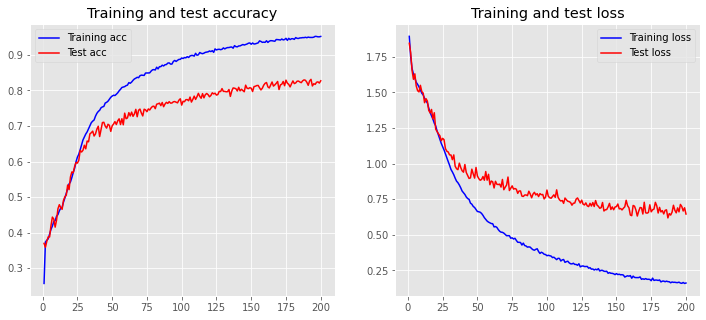

In [14]:
#Best Model

model.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h=model.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=200, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}))

model.save('cnn_1')
plot_history(h)

We take the prevous architecture and increase the regularization

In [15]:
from keras.regularizers import l2


#Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2], 1), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2], 1), name='theme_in')



#Audio layer
audio_Conv1 = Conv2D(32, (3,3), activation='relu',activity_regularizer=l2(0.001))(audio_in)
audio_Pool1 = MaxPooling2D((3,3), strides=(2,2), padding='same')(audio_Conv1)
audio_batch1 = BatchNormalization()(audio_Pool1)

audio_Conv2 = Conv2D(32, (3,3), activation='relu',activity_regularizer=l2(0.001))(audio_batch1)
audio_Pool2 = MaxPooling2D((3,3), strides=(2,2), padding='same')(audio_Conv2)
audio_batch2 = BatchNormalization()(audio_Pool2)

audio_Conv3 = Conv2D(32, (2,2), activation='relu')(audio_batch2)
audio_Pool3 = MaxPooling2D((3,3), strides=(2,2), padding='same')(audio_Conv3)
audio_batch3 = BatchNormalization()(audio_Pool3)
audio_drop1 = Dropout(0.3)(audio_batch3)

audio_flatten1 = Flatten()(audio_drop1)
audio_dense = Dense(64, activation='relu')(audio_flatten1)


#Theme layer

theme_Conv1 = Conv2D(32, (3,3), activation='relu')(theme_in)
theme_Pool1 = MaxPooling2D((3,3), strides=(2,2), padding='same')(theme_Conv1)

theme_drop1 = Dropout(0.1)(theme_Pool1)

theme_flatten1 = Flatten()(theme_drop1)
theme_dense = Dense(64, activation='relu')(theme_flatten1)


#Concatenation 
concat = concatenate([audio_dense, theme_dense])
dense1 = Dense(64, activation='relu',activity_regularizer=l2(0.001))(concat)
dense2 = Dense(32, activation='relu',activity_regularizer=l2(0.001))(dense1)
dense3 = Dense(16, activation='relu',activity_regularizer=l2(0.001))(dense2)
op = Dense(7, activation='softmax',name='op')(dense3)


model2 = Model(inputs=[audio_in,theme_in], outputs=[op])

model2.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_in (InputLayer)          [(None, 250, 15, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_4 (Conv2D)              (None, 248, 13, 32)  320         ['audio_in[0][0]']               
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 124, 7, 32)  0           ['conv2d_4[0][0]']               
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 124, 7, 32)  128         ['max_pooling2d_4[0][0]']  

Epoch 1/300
673/673 [==============================] - 42s 62ms/step - loss: 265.1309 - accuracy: 0.3773 - val_loss: 14.8042 - val_accuracy: 0.4320
Epoch 2/300
673/673 [==============================] - 41s 61ms/step - loss: 8.9704 - accuracy: 0.4591 - val_loss: 5.4305 - val_accuracy: 0.4621
Epoch 3/300
673/673 [==============================] - 40s 60ms/step - loss: 3.9956 - accuracy: 0.4785 - val_loss: 3.1239 - val_accuracy: 0.4331
Epoch 4/300
673/673 [==============================] - 42s 62ms/step - loss: 2.5610 - accuracy: 0.4830 - val_loss: 2.3171 - val_accuracy: 0.4654
Epoch 5/300
673/673 [==============================] - 44s 66ms/step - loss: 2.0419 - accuracy: 0.4888 - val_loss: 2.1781 - val_accuracy: 0.3762
Epoch 6/300
673/673 [==============================] - 45s 67ms/step - loss: 1.8242 - accuracy: 0.4941 - val_loss: 1.8630 - val_accuracy: 0.4401
Epoch 7/300
673/673 [==============================] - 46s 69ms/step - loss: 1.6907 - accuracy: 0.4997 - val_loss: 2.1373 - val

673/673 [==============================] - 39s 58ms/step - loss: 0.8938 - accuracy: 0.7231 - val_loss: 1.3000 - val_accuracy: 0.5955
Epoch 114/300
673/673 [==============================] - 39s 58ms/step - loss: 0.8994 - accuracy: 0.7219 - val_loss: 1.3545 - val_accuracy: 0.5706
Epoch 115/300
673/673 [==============================] - 39s 58ms/step - loss: 0.9150 - accuracy: 0.7205 - val_loss: 1.6697 - val_accuracy: 0.5119
Epoch 116/300
673/673 [==============================] - 39s 58ms/step - loss: 0.8949 - accuracy: 0.7254 - val_loss: 1.3104 - val_accuracy: 0.5714
Epoch 117/300
673/673 [==============================] - 39s 58ms/step - loss: 0.8917 - accuracy: 0.7252 - val_loss: 1.4503 - val_accuracy: 0.5714
Epoch 118/300
673/673 [==============================] - 39s 58ms/step - loss: 0.8953 - accuracy: 0.7266 - val_loss: 1.5179 - val_accuracy: 0.5572
Epoch 119/300
673/673 [==============================] - 39s 58ms/step - loss: 0.8971 - accuracy: 0.7214 - val_loss: 1.2503 - val_ac

Epoch 169/300
673/673 [==============================] - 39s 58ms/step - loss: 0.8009 - accuracy: 0.7616 - val_loss: 1.4009 - val_accuracy: 0.5810
Epoch 170/300
673/673 [==============================] - 39s 58ms/step - loss: 0.7906 - accuracy: 0.7638 - val_loss: 1.3626 - val_accuracy: 0.6037
Epoch 171/300
673/673 [==============================] - 39s 58ms/step - loss: 0.7920 - accuracy: 0.7660 - val_loss: 1.3834 - val_accuracy: 0.6160
Epoch 172/300
673/673 [==============================] - 39s 58ms/step - loss: 0.7858 - accuracy: 0.7688 - val_loss: 1.3228 - val_accuracy: 0.6223
Epoch 173/300
673/673 [==============================] - 39s 58ms/step - loss: 0.8018 - accuracy: 0.7631 - val_loss: 1.3410 - val_accuracy: 0.6052
Epoch 174/300
673/673 [==============================] - 39s 58ms/step - loss: 0.8005 - accuracy: 0.7642 - val_loss: 1.2813 - val_accuracy: 0.6152
Epoch 175/300
673/673 [==============================] - 39s 58ms/step - loss: 0.7933 - accuracy: 0.7665 - val_loss: 1

Epoch 225/300
673/673 [==============================] - 39s 58ms/step - loss: 0.7367 - accuracy: 0.7866 - val_loss: 1.7291 - val_accuracy: 0.5372
Epoch 226/300
673/673 [==============================] - 39s 58ms/step - loss: 0.7183 - accuracy: 0.7893 - val_loss: 1.4404 - val_accuracy: 0.5714
Epoch 227/300
673/673 [==============================] - 39s 58ms/step - loss: 0.7174 - accuracy: 0.7932 - val_loss: 1.3937 - val_accuracy: 0.6022
Epoch 228/300
673/673 [==============================] - 39s 58ms/step - loss: 0.7200 - accuracy: 0.7901 - val_loss: 1.4257 - val_accuracy: 0.5762
Epoch 229/300
673/673 [==============================] - 39s 57ms/step - loss: 0.7281 - accuracy: 0.7893 - val_loss: 1.3568 - val_accuracy: 0.6323
Epoch 230/300
673/673 [==============================] - 39s 58ms/step - loss: 0.7438 - accuracy: 0.7888 - val_loss: 1.4252 - val_accuracy: 0.6190
Epoch 231/300
673/673 [==============================] - 39s 58ms/step - loss: 0.7243 - accuracy: 0.7930 - val_loss: 1

Epoch 281/300
673/673 [==============================] - 39s 58ms/step - loss: 0.7059 - accuracy: 0.7973 - val_loss: 1.3345 - val_accuracy: 0.6450
Epoch 282/300
673/673 [==============================] - 39s 58ms/step - loss: 0.6895 - accuracy: 0.8058 - val_loss: 1.3061 - val_accuracy: 0.6465
Epoch 283/300
673/673 [==============================] - 39s 58ms/step - loss: 0.7091 - accuracy: 0.8002 - val_loss: 1.3030 - val_accuracy: 0.6424
Epoch 284/300
673/673 [==============================] - 39s 58ms/step - loss: 0.6815 - accuracy: 0.8068 - val_loss: 1.3043 - val_accuracy: 0.6216
Epoch 285/300
673/673 [==============================] - 39s 58ms/step - loss: 0.6924 - accuracy: 0.8062 - val_loss: 1.3706 - val_accuracy: 0.6364
Epoch 286/300
673/673 [==============================] - 39s 58ms/step - loss: 0.6945 - accuracy: 0.8020 - val_loss: 1.3262 - val_accuracy: 0.6126
Epoch 287/300
673/673 [==============================] - 39s 59ms/step - loss: 0.6947 - accuracy: 0.8030 - val_loss: 1

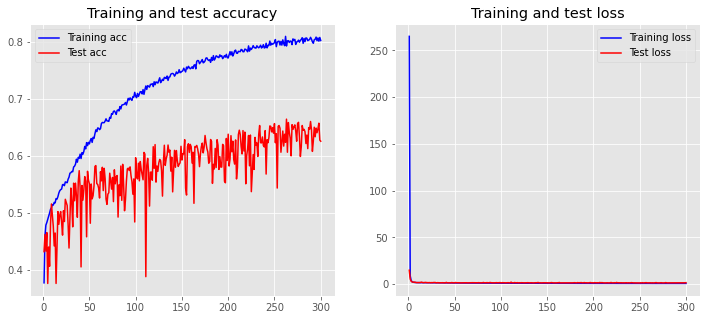

In [16]:

model2.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h2=model2.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=300, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}))

model2.save('cnn_2')
plot_history(h2)

In [18]:
model2.save('cnn_2_2')


INFO:tensorflow:Assets written to: cnn_2_2\assets


Final Model validation - The first model is best.

In [17]:
model.evaluate(x={'audio_in': x_valid_audio, 'theme_in': x_valid_theme},y={'op': y_valid})


85/85 [==============================] - 1s 11ms/step - loss: 0.7038 - accuracy: 0.8164


[0.703818678855896, 0.816356897354126]